# Atividade - IC

## Compare Algorithms script

### 1. Definicao das bibliotecas

In [1]:
# Compare Algorithms script
#1. Definicao das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize'] = [32, 20]
import seaborn as sns
import numpy as np

from scipy import stats
from sklearn import model_selection
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from warnings import filterwarnings
filterwarnings('ignore')

#Preparação e split dos dados
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Busca hiperparametros
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


#Medir tempo de execução
import timeit

### 2. Definicao da semente para geracao de numereos aleatorios

In [2]:
seed = 7

### 3. Leitura dos dados

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Fazendo o carregamento dos dados diretamente do UCI Machine Learning
path = "/content/drive/MyDrive/Colab Notebooks/Bases/bank-full.csv"
bank_original = pd.read_csv(path, sep=";")
bank_original

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### 4. A analise exploratoria dos dados realizada em outro script

In [5]:
print("Apresentando o shape dos dados (dimenssoes)")
print(bank_original.shape)

Apresentando o shape dos dados (dimenssoes)
(45211, 17)


In [6]:
print("Apresentando as colunas")
print(bank_original.columns)

Apresentando as colunas
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [7]:
print("Visualizando o conjunto inicial (head) dos dados, ou mais claramente, os 5 primeiros registros (head(5))")
print(bank_original.head(5))

Visualizando o conjunto inicial (head) dos dados, ou mais claramente, os 5 primeiros registros (head(5))
   age           job  marital  education  ... pdays  previous poutcome   y
0   58    management  married   tertiary  ...    -1         0  unknown  no
1   44    technician   single  secondary  ...    -1         0  unknown  no
2   33  entrepreneur  married  secondary  ...    -1         0  unknown  no
3   47   blue-collar  married    unknown  ...    -1         0  unknown  no
4   33       unknown   single    unknown  ...    -1         0  unknown  no

[5 rows x 17 columns]


In [8]:
print("Conhecendo os dados estatisticos dos dados carregados (describe)")
print(bank_original.describe())

Conhecendo os dados estatisticos dos dados carregados (describe)
                age        balance  ...         pdays      previous
count  45211.000000   45211.000000  ...  45211.000000  45211.000000
mean      40.936210    1362.272058  ...     40.197828      0.580323
std       10.618762    3044.765829  ...    100.128746      2.303441
min       18.000000   -8019.000000  ...     -1.000000      0.000000
25%       33.000000      72.000000  ...     -1.000000      0.000000
50%       39.000000     448.000000  ...     -1.000000      0.000000
75%       48.000000    1428.000000  ...     -1.000000      0.000000
max       95.000000  102127.000000  ...    871.000000    275.000000

[8 rows x 7 columns]


In [9]:
print("Conhecendo a distribuicao dos dados por classes (class distribution)")
print(bank_original.groupby('y').size())

Conhecendo a distribuicao dos dados por classes (class distribution)
y
no     39922
yes     5289
dtype: int64


Criando grafios de caixa da distribuicao das classes


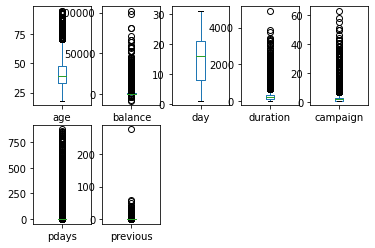

In [10]:
print("Criando grafios de caixa da distribuicao das classes")
bank_original.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False)
plt.show()

Criando histogramas dos dados por classes


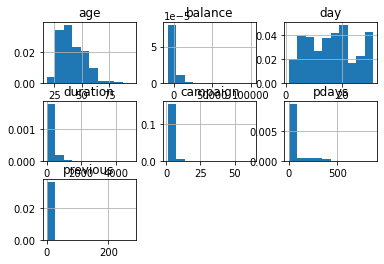

In [11]:
print("Criando histogramas dos dados por classes")
bank_original.hist(density=True)
plt.show()

Criando graficos de dispersao dos dados com paleta de cores


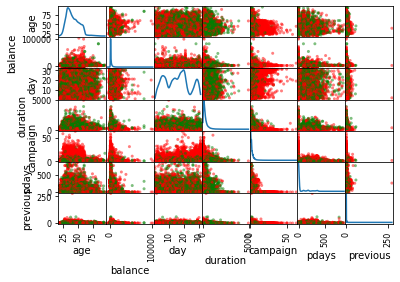

In [12]:
print("Criando graficos de dispersao dos dados com paleta de cores")
colors_palette = {'no': 'red', 'yes': 'green'}
colors = [colors_palette[c] for c in bank_original['y']]
scatter_matrix(bank_original, c=colors, diagonal='kde')
plt.show()

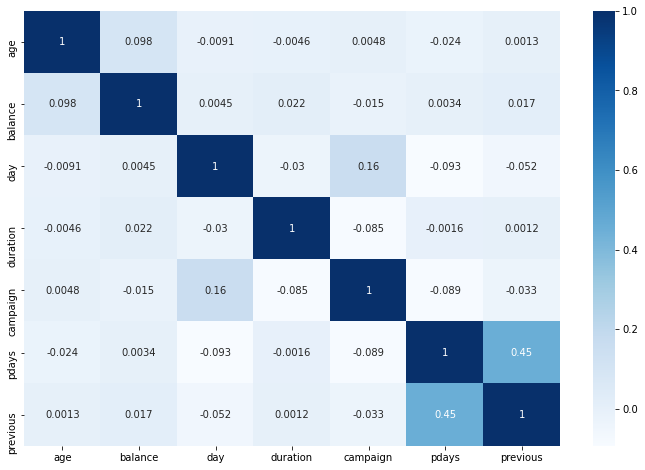

In [13]:
plt.figure(figsize=(12,8))
ax=sns.heatmap(bank_original.corr(), cmap='Blues', annot=True )
plt.show()

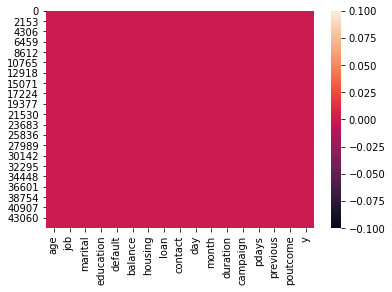

In [14]:
sns.heatmap(bank_original.isna())

In [15]:
print("Realiza a contagem de valores NaN em cada coluna")
print(bank_original.isnull().sum())

Realiza a contagem de valores NaN em cada coluna
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### 5. Preparacao dos dados conduzida em outro script

In [16]:
#Conversão de Atributos categóricos para Binários
le = LabelEncoder()
for column_name in bank_original.columns:
    if bank_original[column_name].dtype == object:
        #dataset[column_name] = pandas.Categorical(dataset[column_name]).codes()
        bank_original[column_name] = le.fit_transform(bank_original[column_name])
    else:
        pass
bank_original    

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [17]:
#Aplicar o método MinMax para normalização dos dados
X = bank_original.values[:,0:15] 
Y = bank_original.values[:,16]

### 6. Divisao da base de dados em treinamento, validacao e teste

In [18]:
#Realizar a divisão do conjunto de dados de forma estratificada criando o conjunto de treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.80, random_state = seed)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=seed)

#normaliza os dados
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

#normaliza os dados
scaler = MinMaxScaler().fit(X_test)
X_test = scaler.transform(X_test)

print("Resumo dos dados modificados")
np.set_printoptions(precision=3)
print(X_train)

Resumo dos dados modificados
[[0.39  0.818 0.5   ... 0.    0.    0.   ]
 [0.156 0.    0.5   ... 0.    0.    0.   ]
 [0.377 0.091 0.5   ... 0.032 0.    0.   ]
 ...
 [0.247 0.909 0.    ... 0.    0.    0.   ]
 [0.39  0.091 1.    ... 0.065 0.    0.   ]
 [0.351 0.364 0.5   ... 0.065 0.    0.   ]]


In [19]:
X_train.shape

(9042, 15)

In [20]:
y_train.shape

(9042,)

In [21]:
#X_test

### 7. Definicao dos modelos de classificacao

In [22]:
#
#instancias dos modelos
RFC = RandomForestClassifier()
DTC = tree.DecisionTreeClassifier()
MLP = MLPClassifier()
BMLP = BaggingClassifier()

### 8. Realizar busca com o gridsearch para encontrar os melhores parametros de cada modelo

In [23]:
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=2, random_state=seed)

#### 8.1 - RFC - Random Forest Classifier

In [24]:
# define search space
space_rfc = dict()
space_rfc['criterion'] = ['gini', 'entropy']
space_rfc['min_samples_split'] = [2,3,5]
space_rfc['max_depth'] = [3,5,6,7,9,11]
space_rfc['min_samples_leaf'] = [1, 2, 3]

In [25]:

# define random search
search = RandomizedSearchCV(RFC, space_rfc, n_iter=200, scoring='accuracy', n_jobs=-1, cv=cv, random_state=seed)

# execute search
resultRandom = search.fit(X_train, y_train)

# summarize result
print('=========Random Search Results==========')
print('Best Score: %s' % resultRandom.best_score_)
print('Best Hyperparameters: %s' % resultRandom.best_params_)

# define grid search
search = GridSearchCV(RFC, space_rfc, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
resultGrid = search.fit(X_train, y_train)

print('=========Grid Search Results==========')
print('Best Score: %s' % resultGrid.best_score_)
print('Best Hyperparameters: %s' % resultGrid.best_params_)

=========Random Search Results==========
Best Score: 0.9000221190002211
Best Hyperparameters: {'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 11, 'criterion': 'gini'}
=========Grid Search Results==========
Best Score: 0.9011833665118338
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [26]:
if (resultRandom.best_score_ >= resultGrid.best_score_):
    RFC = resultRandom.best_estimator_
    print('Random')
else:
    RFC = resultGrid.best_estimator_    
    print('Grid')
    
RFC    

Grid


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### 8.2 - DTC - Decision Tree Classifier

In [27]:
# define search space
space_dtc = dict()
space_dtc['criterion'] = ['gini', 'entropy']
space_dtc['min_samples_split'] = [2,3,5]
space_dtc['max_depth'] = [3,5,6,7,9,11,13]
space_dtc['min_samples_leaf'] = [1, 2, 3]

In [28]:

# define random search
search = RandomizedSearchCV(DTC, space_dtc, n_iter=200, scoring='accuracy', n_jobs=-1, cv=cv, random_state=seed)

# execute search
resultRandom = search.fit(X_train, y_train)

# summarize result
print('=========Random Search Results==========')
print('Best Score: %s' % resultRandom.best_score_)
print('Best Hyperparameters: %s' % resultRandom.best_params_)

# define grid search
search = GridSearchCV(DTC, space_dtc, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
resultGrid = search.fit(X_train, y_train)

print('=========Grid Search Results==========')
print('Best Score: %s' % resultGrid.best_score_)
print('Best Hyperparameters: %s' % resultGrid.best_params_)

#=========Random Search Results==========
#Best Score: 0.894096530799656
#Best Hyperparameters: {'min_samples_split': 7, 'min_samples_leaf': 3, 'max_depth': 9, 'criterion': 'entropy'}
#=========Grid Search Results==========
#Best Score: 0.8941776354309405
#Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 7}

=========Random Search Results==========
Best Score: 0.8923910639239105
Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 7, 'criterion': 'gini'}
=========Grid Search Results==========
Best Score: 0.8926122539261225
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [29]:
if (resultRandom.best_score_ >= resultGrid.best_score_):
    DTC = resultRandom.best_estimator_
    print('Random')
else:
    DTC = resultGrid.best_estimator_    
    print('Grid')
    
DTC    

Grid


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 8.3 - MLP - MLP Classifier

In [30]:
# define search space
space_mlp = dict()
space_mlp['hidden_layer_sizes'] = [(3,3), (3,3,3), (3,2,3), (4,4), (4,3,4), (10,10), (50, 10, 50), (30, 30)]
space_mlp['activation'] = ['identity', 'tanh', 'relu']
space_mlp['solver'] = ['lbfgs', 'adam']

In [31]:
MLP = MLPClassifier()
MLP

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [32]:
#
# define random search
search = RandomizedSearchCV(MLP, space_mlp, n_iter=200, scoring='accuracy', n_jobs=-1, cv=cv, random_state=seed)

# execute search
resultRandom = search.fit(X_train, y_train)

# summarize result
print('=========Random Search Results==========')
print('Best Score: %s' % resultRandom.best_score_)
print('Best Hyperparameters: %s' % resultRandom.best_params_)

# define grid search
search = GridSearchCV(MLP, space_mlp, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
resultGrid = search.fit(X_train, y_train)

print('=========Grid Search Results==========')
print('Best Score: %s' % resultGrid.best_score_)
print('Best Hyperparameters: %s' % resultGrid.best_params_)

=========Random Search Results==========
Best Score: 0.8954877239548772
Best Hyperparameters: {'solver': 'adam', 'hidden_layer_sizes': (50, 10, 50), 'activation': 'tanh'}
=========Grid Search Results==========
Best Score: 0.8948241539482416
Best Hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (10, 10), 'solver': 'adam'}


In [33]:
if (resultRandom.best_score_ >= resultGrid.best_score_):
    MLP = resultRandom.best_estimator_
    print('Random')
else:
    MLP = resultGrid.best_estimator_    
    print('Grid')
    
MLP    

Random


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 10, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### 8.4 - BMLP - Bagging Classifier

In [34]:
# define search space
space_bmlp = dict()
space_bmlp['base_estimator'] = [RFC, DTC, MLP]
space_bmlp['n_estimators'] = [10, 12, 14, 16]
space_bmlp['max_samples'] = [1, 2 , 3, 4]
space_bmlp['max_features'] = [1, 2 , 3, 4]

In [35]:

# define random search
search = RandomizedSearchCV(BMLP, space_bmlp, n_iter=200, scoring='accuracy', n_jobs=-1, cv=cv, random_state=seed)

# execute search
resultRandom = search.fit(X_train, y_train)

# summarize result
print('=========Random Search Results==========')
print('Best Score: %s' % resultRandom.best_score_)
print('Best Hyperparameters: %s' % resultRandom.best_params_)

# define grid search
search = GridSearchCV(BMLP, space_bmlp, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
resultGrid = search.fit(X_train, y_train)

print('=========Grid Search Results==========')
print('Best Score: %s' % resultGrid.best_score_)
print('Best Hyperparameters: %s' % resultGrid.best_params_)

=========Random Search Results==========
Best Score: 0.8848706038487061
Best Hyperparameters: {'n_estimators': 12, 'max_samples': 4, 'max_features': 4, 'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')}
=========Grid Search Results==========
Best Score: 0.8847047113470472
Best Hyperparameters: {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
    

In [36]:
if (resultRandom.best_score_ >= resultGrid.best_score_):
    BMLP = resultRandom.best_estimator_
    print('Random')
else:
    BMLP = resultGrid.best_estimator_    
    print('Grid')
    
BMLP    

Random


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=7,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

#### 8.5 - Lista de Modelos

In [37]:
#adiciona os modelos em uma lista
models = []
models.append(('ComiteArvore', RFC))
models.append(('Arvore', DTC))
models.append(('RedeNeural', MLP))
models.append(('ComiteRede', BMLP))
# evaluate each model in turn
results = []
names = []
#deficao da metrica a ser utilizada
scoring = 'accuracy'

### 9. Definicao do modelo experimental

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = seed)

#normaliza os dados
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

#normaliza os dados
scaler = MinMaxScaler().fit(X_test)
X_test = scaler.transform(X_test)

print("Resumo dos dados modificados")
np.set_printoptions(precision=3)
print(X_train)

Resumo dos dados modificados
[[0.273 0.091 0.5   ... 0.016 0.    0.   ]
 [0.273 0.636 0.    ... 0.048 0.    0.   ]
 [0.078 0.364 1.    ... 0.    0.    0.   ]
 ...
 [0.247 0.909 0.    ... 0.    0.    0.   ]
 [0.39  0.091 1.    ... 0.065 0.    0.   ]
 [0.351 0.364 0.5   ... 0.065 0.    0.   ]]


In [39]:
#9. Definicao do modelo experimental
#amostragem estratificada
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)

### 10 Execucao do modelo experimental

In [40]:
#
#10 Execucao do modelo experimental
#avaliacao de cada modelo nas amotragens estratificas
print('\nDesempenhos medios dos modelos:')
for name, model in models:
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


Desempenhos medios dos modelos:
ComiteArvore: 0.895924 (0.002497)
Arvore: 0.891972 (0.004309)
RedeNeural: 0.895099 (0.004509)
ComiteRede: 0.881296 (0.000141)


### 11 Comparacao de modelos

In [41]:
#
#11 Comparacao de modelos
# Teste de hipotese analisando o p-value
stat, p = stats.kruskal(results[0],results[1],results[2],results[3])
alpha = 0.05
if p > alpha:
    print('\nSame distributions (fail to reject H0)')
else:
    print('\nDifferent distributions (reject H0)')
print('\nComparison stats', stat)

print('Comparacao Arvore | ComiteArvore ->', stats.kruskal(results[0],results[1]))
print('Comparacao Arvore | RedeNeural ->',stats.kruskal(results[0],results[2]))
print('Comparacao Arvore | CRNA ->',stats.kruskal(results[0],results[3]))
print('Comparacao ComiteArvore | RedeNeural ->',stats.kruskal(results[1],results[2]))
print('Comparacao ComiteArvore | ComiteRede ->',stats.kruskal(results[1],results[3]))
print('Comparacao RedeNeural | ComiteRede ->',stats.kruskal(results[2],results[3]))

#treinamento dos modelos no conjunto de treino completo (sem divisao de validacao)
RFC.fit(X_train, y_train)
DTC.fit(X_train, y_train)
MLP.fit(X_train, y_train)
BMLP.fit(X_train, y_train)


Different distributions (reject H0)

Comparison stats 24.64863110358452
Comparacao Arvore | ComiteArvore -> KruskalResult(statistic=4.018900602409625, pvalue=0.04499303387735483)
Comparacao Arvore | RedeNeural -> KruskalResult(statistic=1.1225320271288524, pvalue=0.2893738955949503)
Comparacao Arvore | CRNA -> KruskalResult(statistic=14.559386973180068, pvalue=0.00013581035087951434)
Comparacao ComiteArvore | RedeNeural -> KruskalResult(statistic=1.753956292388847, pvalue=0.18538014335551614)
Comparacao ComiteArvore | ComiteRede -> KruskalResult(statistic=14.570552147239255, pvalue=0.0001350079738856921)
Comparacao RedeNeural | ComiteRede -> KruskalResult(statistic=14.570552147239255, pvalue=0.0001350079738856921)


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=7,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [42]:
#predicao de cada modelo para a base de teste
Y_test_prediction_RFC = RFC.predict(X_test)
Y_test_prediction_DTC = DTC.predict(X_test)
Y_test_prediction_MLP = MLP.predict(X_test)
Y_test_prediction_BMLP = BMLP.predict(X_test)

In [43]:
Y_test_prediction_BMLP

array([0, 0, 0, ..., 0, 0, 0])

### 12 Apresentacao de resultados


Acuracia Comite de Arvore: Treinamento 0.9307243128465259  Teste 0.8987879324073255
Clasification report:               precision    recall  f1-score   support

           0       0.92      0.97      0.94     10039
           1       0.59      0.30      0.40      1264

    accuracy                           0.90     11303
   macro avg       0.75      0.64      0.67     11303
weighted avg       0.88      0.90      0.88     11303

Confussion matrix:
 [[9774  265]
 [ 879  385]]

Acuracia Arvore: Treinamento 0.9033561401439189  Teste 0.8914447491816332
Clasification report:               precision    recall  f1-score   support

           0       0.93      0.95      0.94     10039
           1       0.52      0.43      0.47      1264

    accuracy                           0.89     11303
   macro avg       0.72      0.69      0.70     11303
weighted avg       0.88      0.89      0.89     11303

Confussion matrix:
 [[9533  506]
 [ 721  543]]

Acuracia Rede Neural: Treinamento 0.89993511855

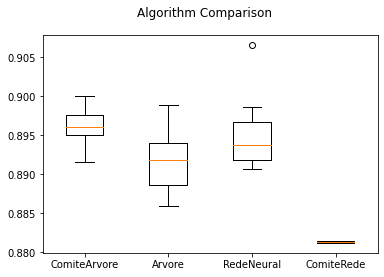

In [44]:
#12 Apresentacao de resultados
print("\nAcuracia Comite de Arvore: Treinamento",  RFC.score(X_train, y_train)," Teste" ,RFC.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_RFC))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_RFC))

print("\nAcuracia Arvore: Treinamento",  DTC.score(X_train, y_train)," Teste" ,DTC.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_DTC))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_DTC))

print("\nAcuracia Rede Neural: Treinamento",  MLP.score(X_train, y_train)," Teste" ,MLP.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_MLP))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_MLP))

print("\nAcuracia Comite RNA: Treinamento",  BMLP.score(X_train, y_train)," Teste" ,BMLP.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_BMLP))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_BMLP))

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


#### Outros Exemplos::

In [45]:
# Significance stats tests
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
from scipy.stats import friedmanchisquare
from scipy.stats import kruskal
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52

# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Mann-Whitney Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

stat, p = wilcoxon(data1, data2)
print('Wilcoxon Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

stat, p = kruskal(data1, data2, data3)
print('Kruskal-Wallis Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

stat, p = friedmanchisquare(data1, data2, data3)
print('Friedman Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Mann-Whitney Statistic: s=4597.000, p=0.163
Same distributions (fail to reject H0)
Wilcoxon Statistic: s=2314.000, p=0.468
Same distributions (fail to reject H0)
Kruskal-Wallis Statistic: s=6.051, p=0.049
Different distributions (reject H0)
Friedman Statistic: s=9.360, p=0.009
Different distributions (reject H0)


In [46]:
# random search decision tree model on the pima-diabetes dataset
from pandas import read_csv
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#Leitura dos dados
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv("pima-indians-diabetes.csv", names=names)

#Preparacao dos dados conduzida em outro script
print("Apresentando o shape dos dados (dimenssoes)")
print(dataframe.shape)
array = dataframe.values
X = array[:,0:8]
y = array[:,8]

# define model
model = DecisionTreeClassifier()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['criterion'] = ['gini', 'entropy']
space['min_samples_split'] = [2,3,5,7]
space['max_depth'] = [3,5,6,7,9,11,13,15,17,19]
space['min_samples_leaf'] = [1, 2, 3]

# define random search
search = RandomizedSearchCV(model, space, n_iter=200, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X, y)

# summarize result
print('=========Random Search Results==========')
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

# define grid search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

print('=========Grid Search Results==========')
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)



FileNotFoundError: ignored